In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Define the path
path = "/Users/emadabdellatif/Documents/Projects/box-office-predictions"

# Change the current working directory
os.chdir(path)

# Verify the change
print("Current Working Directory:", os.getcwd())

# Load datasets
train_data = pd.read_csv('train.csv', na_values=["", "#N/A", "[]", "0"])
test_data = pd.read_csv('test.csv', na_values=["", "#N/A", "[]", "0"])

# Combine train and test data for preprocessing
full_data = pd.concat([train_data, test_data], ignore_index=True)

Current Working Directory: /Users/emadabdellatif/Documents/Projects/box-office-predictions


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7398 non-null   int64  
 1   belongs_to_collection  1481 non-null   object 
 2   budget                 5375 non-null   float64
 3   genres                 7375 non-null   object 
 4   homepage               2366 non-null   object 
 5   imdb_id                7398 non-null   object 
 6   original_language      7398 non-null   object 
 7   original_title         7398 non-null   object 
 8   overview               7376 non-null   object 
 9   popularity             7398 non-null   float64
 10  poster_path            7396 non-null   object 
 11  production_companies   6984 non-null   object 
 12  production_countries   7241 non-null   object 
 13  release_date           7397 non-null   object 
 14  runtime                7371 non-null   float64
 15  spok

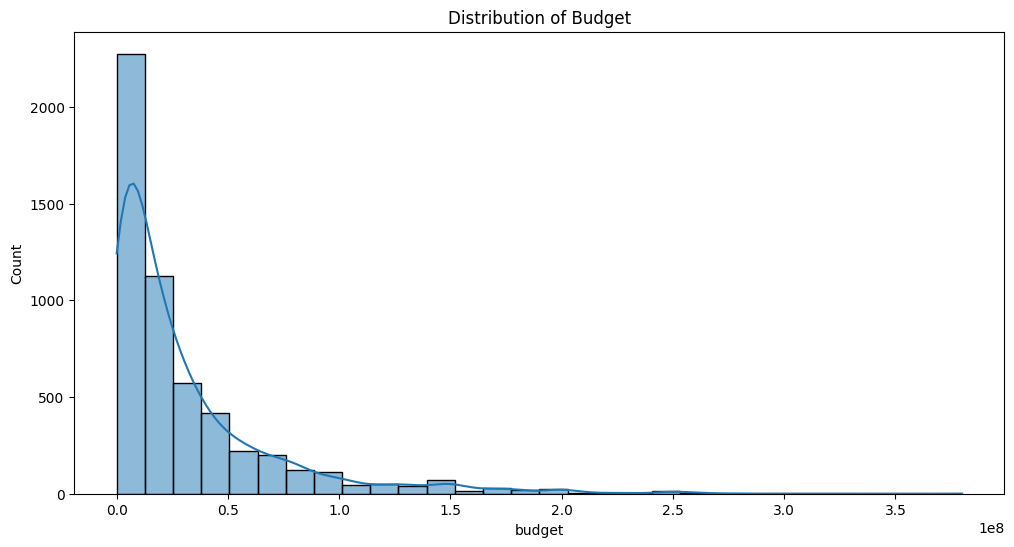

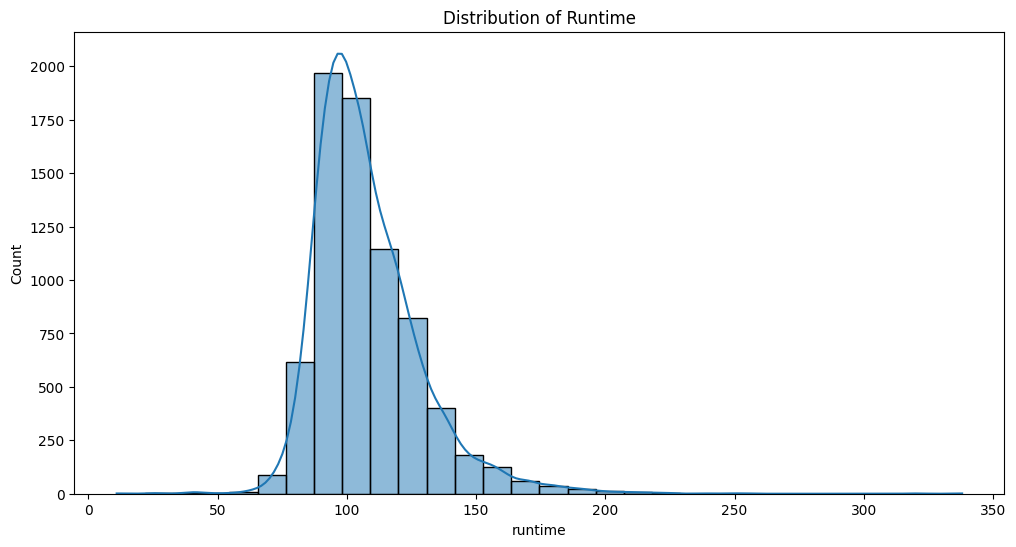

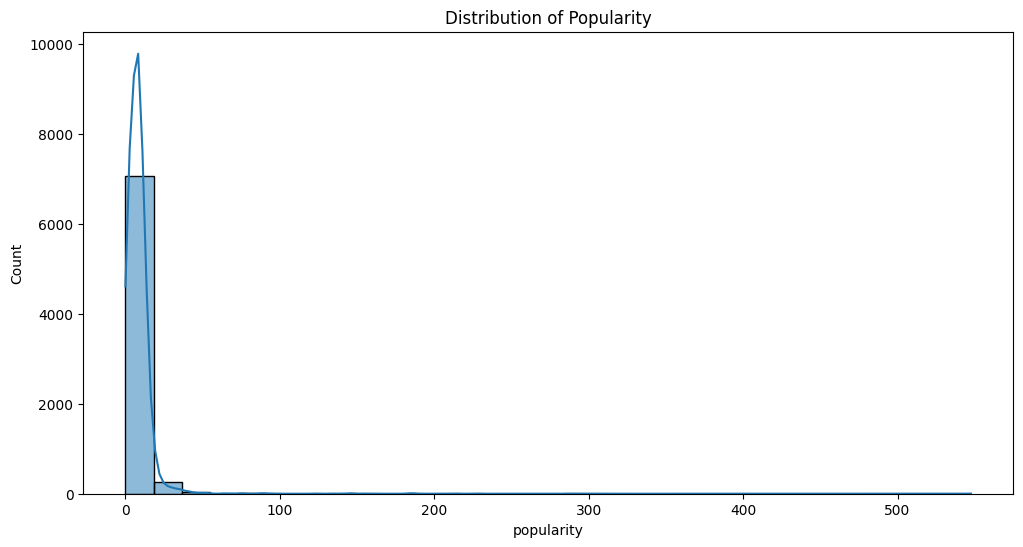

Mean Absolute Error: 33957695.160540536


In [3]:

# Display basic information
print(full_data.info())

# Exploratory Data Analysis
plt.figure(figsize=(12,6))
sns.histplot(full_data['budget'].dropna(), bins=30, kde=True)
plt.title("Distribution of Budget")
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(full_data['runtime'].dropna(), bins=30, kde=True)
plt.title("Distribution of Runtime")
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(full_data['popularity'].dropna(), bins=30, kde=True)
plt.title("Distribution of Popularity")
plt.show()

# Handling missing values
full_data.fillna(full_data.median(numeric_only=True), inplace=True)

# Feature Selection (Assume relevant features are selected)
selected_features = ['budget', 'runtime', 'popularity']
X = full_data[selected_features]
y = full_data['revenue']  # Assuming 'revenue' is the target variable

# Splitting data back into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
